    Loan_ID Gender Married Dependents     Education Self_Employed  \
0  LP001002   Male      No          0      Graduate            No   
1  LP001003   Male     Yes          1      Graduate            No   
2  LP001005   Male     Yes          0      Graduate           Yes   
3  LP001006   Male     Yes          0  Not Graduate            No   
4  LP001008   Male      No          0      Graduate            No   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5849                0.0         NaN             360.0   
1             4583             1508.0       128.0             360.0   
2             3000                0.0        66.0             360.0   
3             2583             2358.0       120.0             360.0   
4             6000                0.0       141.0             360.0   

   Credit_History Property_Area Loan_Status  
0             1.0         Urban           Y  
1             1.0         Rural           N  
2             1.0   

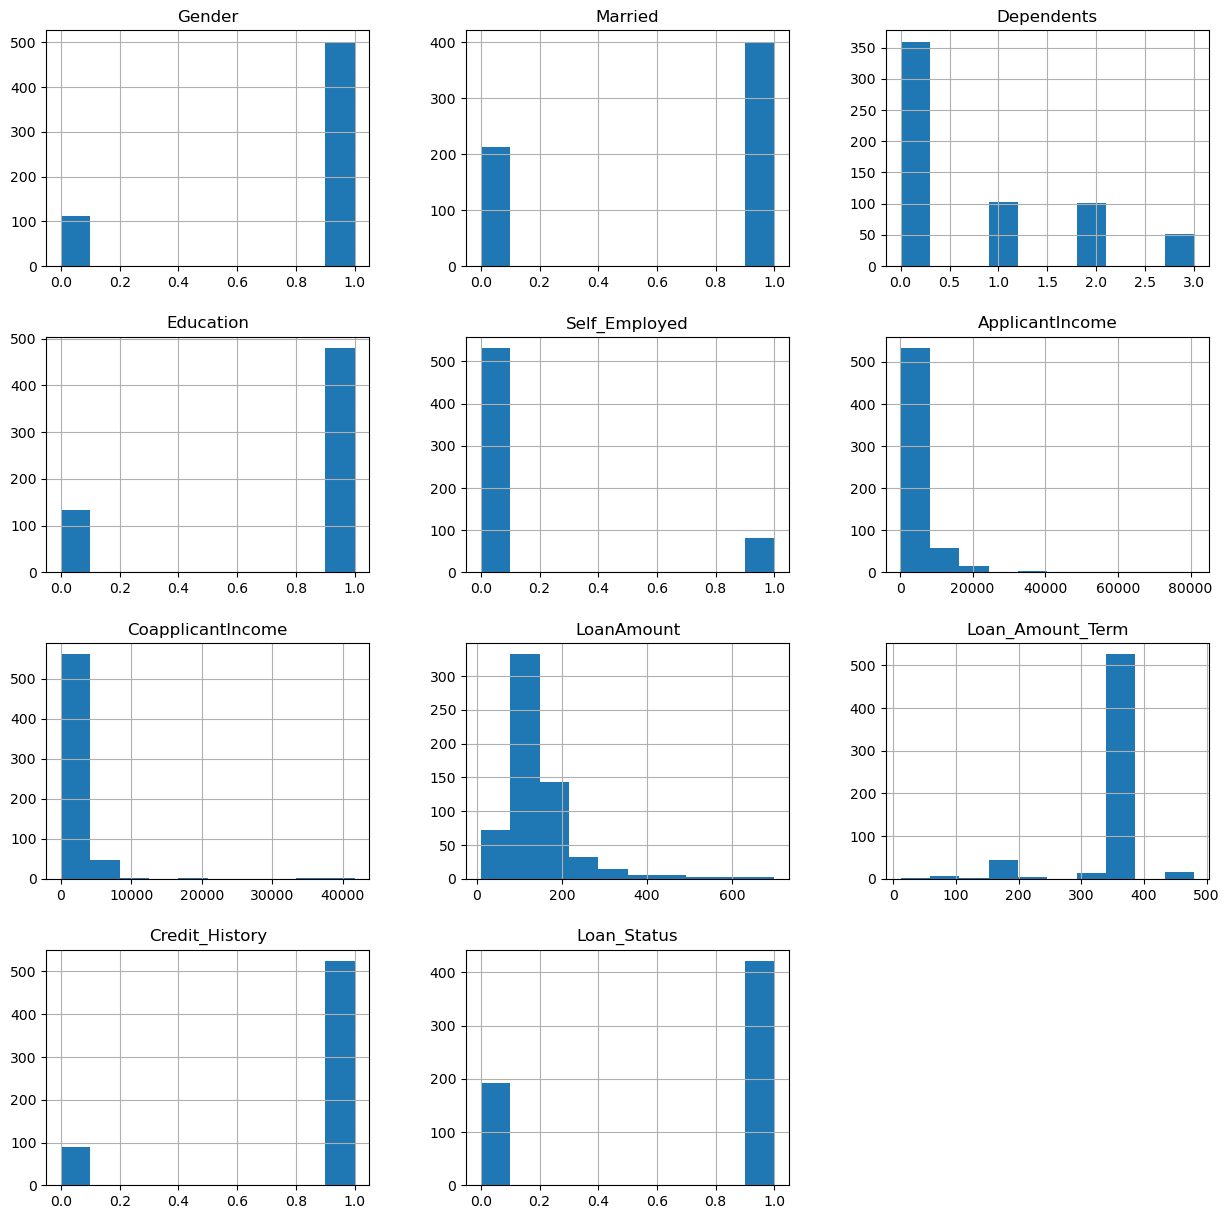

Loan_Status
1    422
0    192
Name: count, dtype: int64


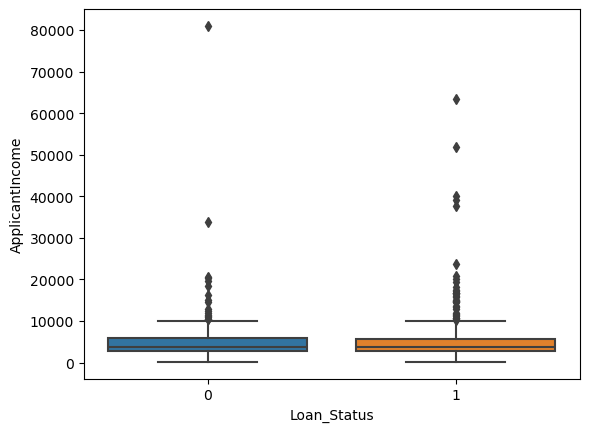

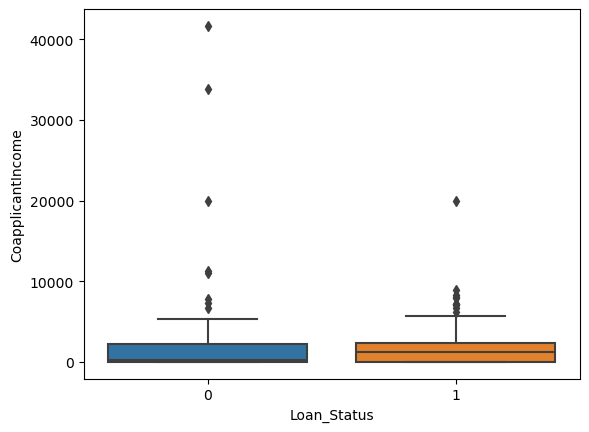

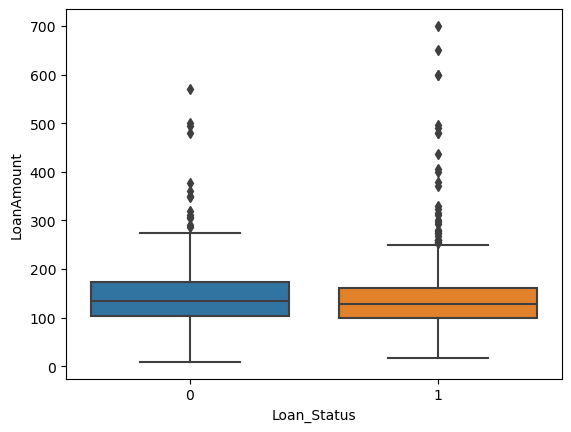

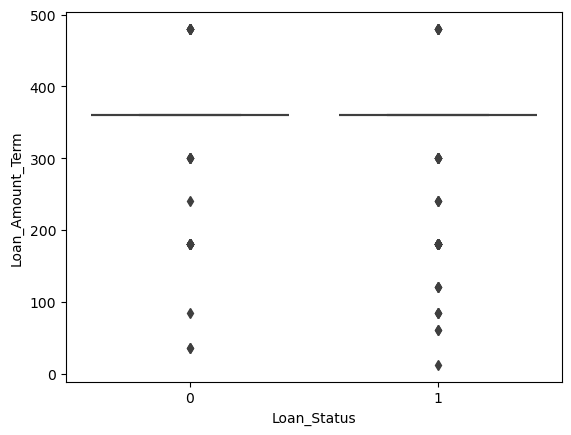

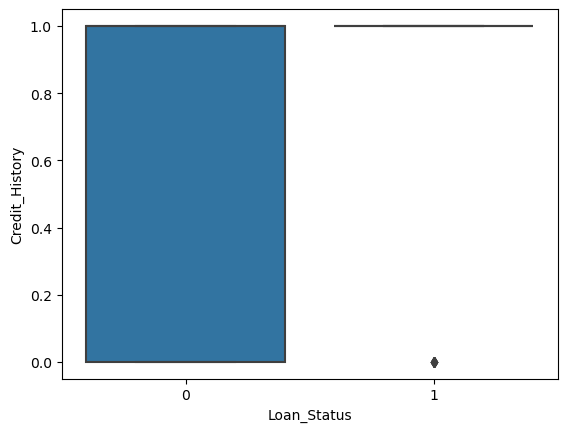

     Gender  Married  Dependents  ApplicantIncome  LoanAmount  Credit_History  \
0       1.0      0.0         0.0             5849  146.412162             1.0   
1       1.0      1.0         1.0             4583  128.000000             1.0   
2       1.0      1.0         0.0             3000   66.000000             1.0   
3       1.0      1.0         0.0             2583  120.000000             1.0   
4       1.0      0.0         0.0             6000  141.000000             1.0   
..      ...      ...         ...              ...         ...             ...   
609     0.0      0.0         0.0             2900   71.000000             1.0   
610     1.0      1.0         3.0             4106   40.000000             1.0   
611     1.0      1.0         1.0             8072  253.000000             1.0   
612     1.0      1.0         2.0             7583  187.000000             1.0   
613     0.0      0.0         0.0             4583  133.000000             0.0   

     Loan_Status  
0       

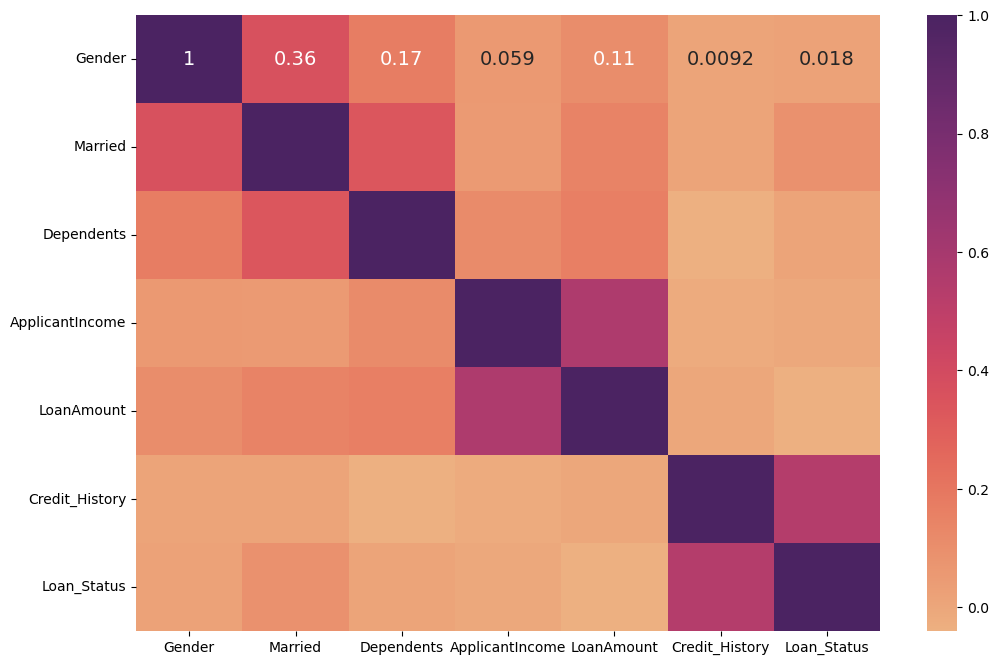

Predicted_Status
1    266
0    101
Name: count, dtype: int64


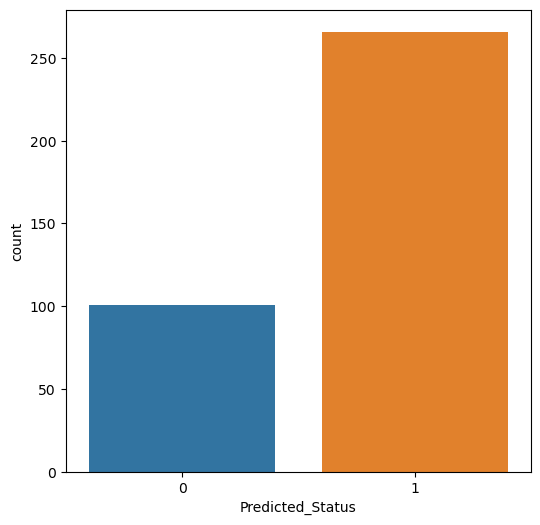

     Gender  Married  Dependents  ApplicantIncome  LoanAmount  Credit_History
0       1.0      0.0         0.0             5849  146.412162             1.0
1       1.0      1.0         1.0             4583  128.000000             1.0
2       1.0      1.0         0.0             3000   66.000000             1.0
3       1.0      1.0         0.0             2583  120.000000             1.0
4       1.0      0.0         0.0             6000  141.000000             1.0
..      ...      ...         ...              ...         ...             ...
609     0.0      0.0         0.0             2900   71.000000             1.0
610     1.0      1.0         3.0             4106   40.000000             1.0
611     1.0      1.0         1.0             8072  253.000000             1.0
612     1.0      1.0         2.0             7583  187.000000             1.0
613     0.0      0.0         0.0             4583  133.000000             0.0

[614 rows x 6 columns]
[1 1 0 0 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1

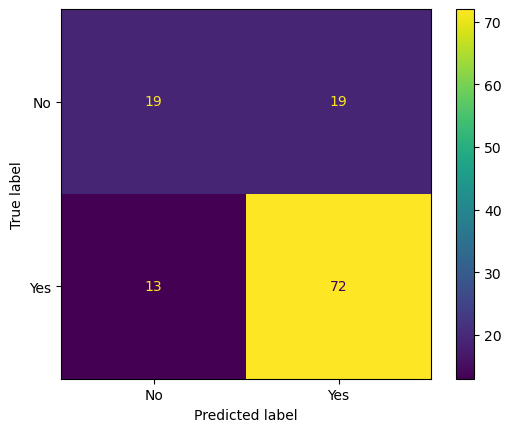

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, accuracy_score, roc_auc_score,ConfusionMatrixDisplay
from sklearn import metrics
from xgboost import XGBClassifier #-- for classification (Binary Y)
#from xgboost import XGBRegressor -- for regression (continuous Y)

#Read data
data=pd.read_csv('train.csv')
print(data.head())

# data distribution using rows and columns
r,c=data.shape
print('rows',r,' columns',c)
print(data.info())

# to understand statistic variation
print(data.describe())

# converting characterize data into numeric
data['Gender']=data['Gender'].replace(['Male','Female'],[1,0])
data['Loan_Status']=data['Loan_Status'].replace(['Y','N'],[1,0])
data['Married']=data['Married'].replace(['Yes','No'],[1,0])
data['Education']=data['Education'].replace(['Graduate', 'Not Graduate'],[1,0])
data['Self_Employed']=data['Self_Employed'].replace(['Yes','No'],[1,0])
data['Dependents']=data['Dependents'].replace(['0','1','2','3+'],[0,1,2,3])

print(data.isnull().sum())

data['Gender']=data['Gender'].fillna(data['Gender'].mode()[0])
data['Married']=data['Married'].fillna(data['Married'].mode()[0])
data['Dependents']=data['Dependents'].fillna(data['Dependents'].mode()[0])
data['Self_Employed']=data['Self_Employed'].fillna(data['Self_Employed'].mode()[0])
data['LoanAmount']=data['LoanAmount'].fillna(data['LoanAmount'].mean())
data['Loan_Amount_Term']=data['Loan_Amount_Term'].fillna(data['Loan_Amount_Term'].mode()[0])
data['Credit_History']=data['Credit_History'].fillna(data['Credit_History'].mode()[0])

print(data.isnull().sum())

# check columns
print(data.columns)

# check data distribution
data.hist(figsize=(15, 15))
plt.show()

# check count of target variable
print(data["Loan_Status"].value_counts())
# data analyzing using box plot method
sns.boxplot(x="Loan_Status", y="ApplicantIncome", data=data)
plt.show()
sns.boxplot(x="Loan_Status", y="CoapplicantIncome", data=data)
plt.show()
sns.boxplot(x="Loan_Status", y="LoanAmount", data=data)
plt.show()
sns.boxplot(x="Loan_Status", y="Loan_Amount_Term", data=data)
plt.show()
sns.boxplot(x="Loan_Status", y="Credit_History", data=data)
plt.show()

# plot correlation
cols = ["Loan_ID", "Self_Employed",  "Education", "Property_Area", "CoapplicantIncome", "Loan_Amount_Term"]
data=data.drop(columns=cols, axis=1)
print(data)
fig, ax = plt.subplots(figsize=(12, 8))
corr_heatmap = sns.heatmap(data.corr(), cmap="flare", annot=True, ax=ax, annot_kws={"size": 14})
plt.show()

# plot categorical features
def categorical_valcount_hist(feature):
    test = pd.read_csv("test.csv")
    print(test[feature].value_counts())
    fig, ax = plt.subplots(figsize=(6, 6))
    sns.countplot(x=feature, ax=ax, data=test)
    plt.show()

categorical_valcount_hist("Predicted_Status")

# splitting data into train and test split
x = data.drop("Loan_Status", axis=1)
y = data["Loan_Status"]
print(x)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, stratify=y, random_state=7)

#XGBOOST
pipeline=XGBClassifier()
pipeline.fit(x_train, y_train)
y_pred = pipeline.predict(x_test)
print(y_pred)

# check accuracy
print("-------------------------TEST SCORES-----------------------")
print(f"Recall: { round(recall_score(y_test, y_pred)*100, 4) }")
print(f"Precision: { round(precision_score(y_test, y_pred)*100, 4) }")
print(f"F1-Score: { round(f1_score(y_test, y_pred)*100, 4) }")
print(f"Accuracy score: { round(accuracy_score(y_test, y_pred)*100, 4) }")
print(f"AUC Score: { round(roc_auc_score(y_test, y_pred)*100, 4) }")

cm=confusion_matrix(y_test, y_pred, labels=pipeline.classes_)
print(cm)
cm_display=ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["No","Yes"])
#ConfusionMatrix
cm_display.plot()
#FN | FP
#---------
#TN | TP  

#XG Boost--
#92 % accuracy
#speed and performance
#XGBClassifier(), just use this model fit command 
#it will handle null values internally
